In [13]:
import pandas as pd
import numpy as np
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
date_time = "2023-01-27_13:00"
error_df = pd.read_csv(f"/home/da2343/cs685_fall22/data_transf_comp/results/{date_time}_results.csv")

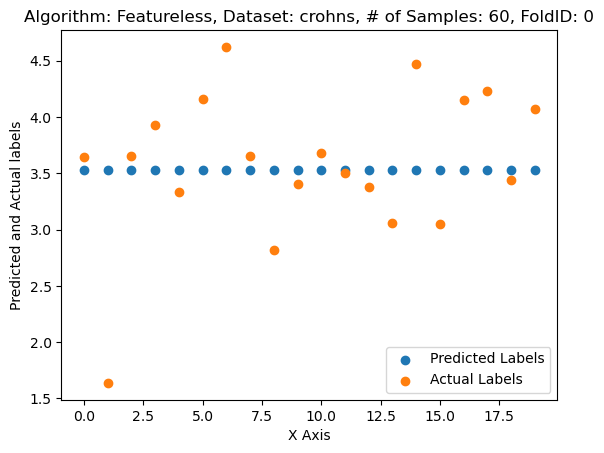

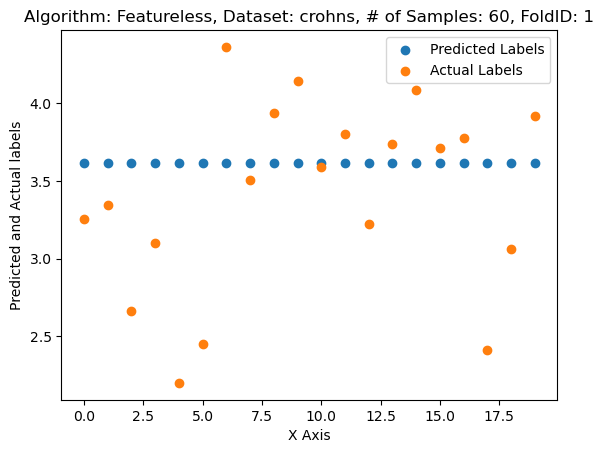

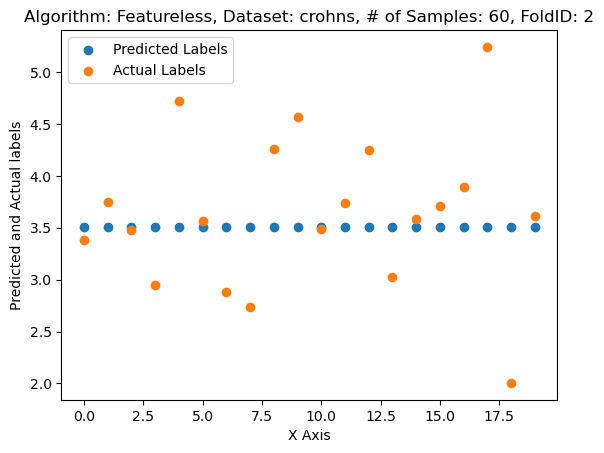

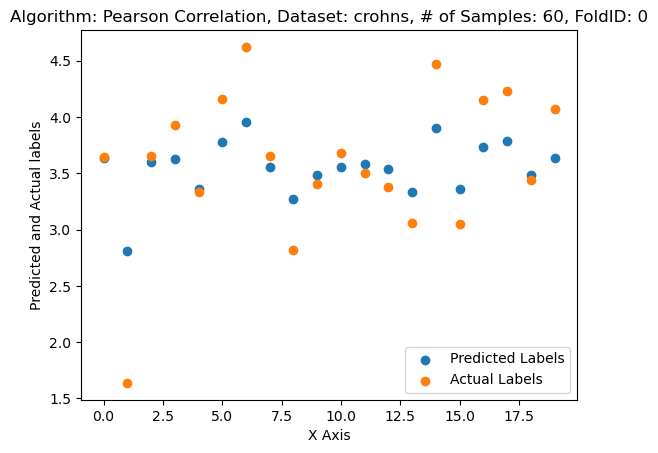

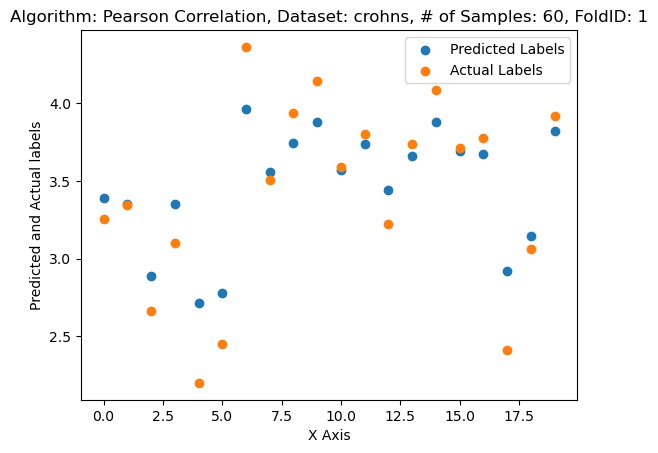

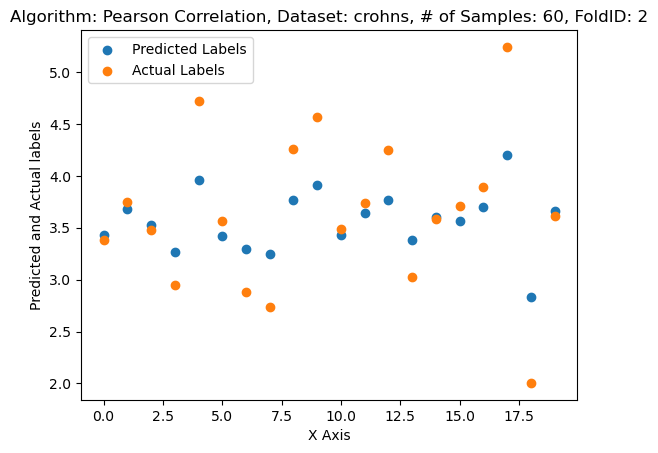

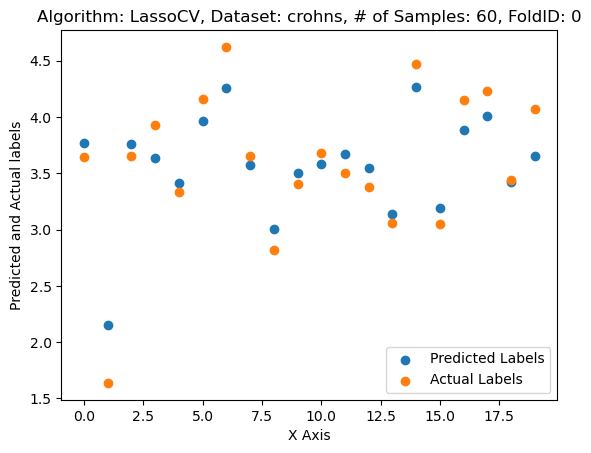

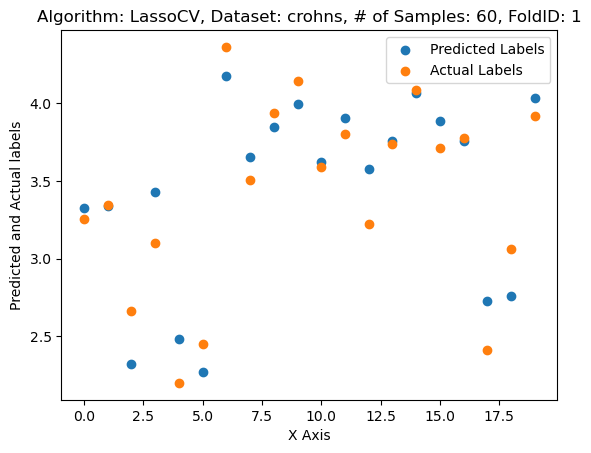

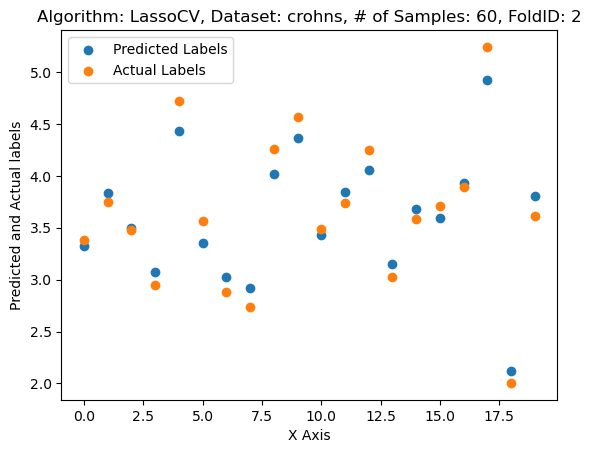

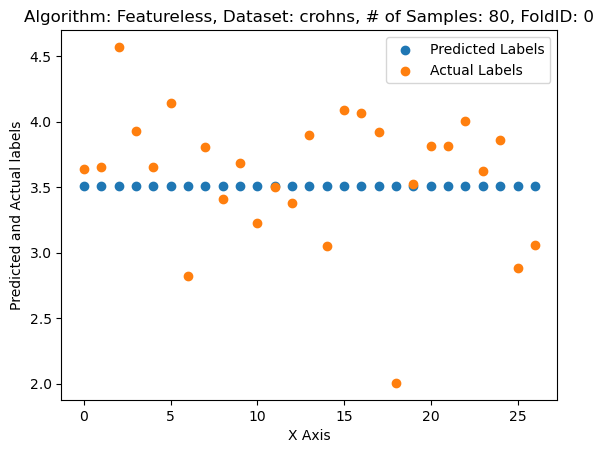

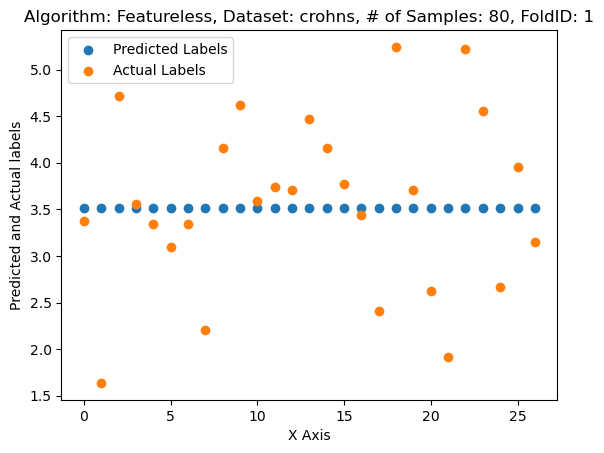

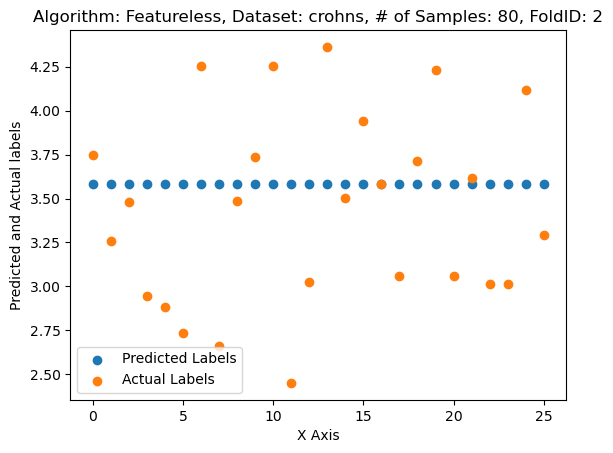

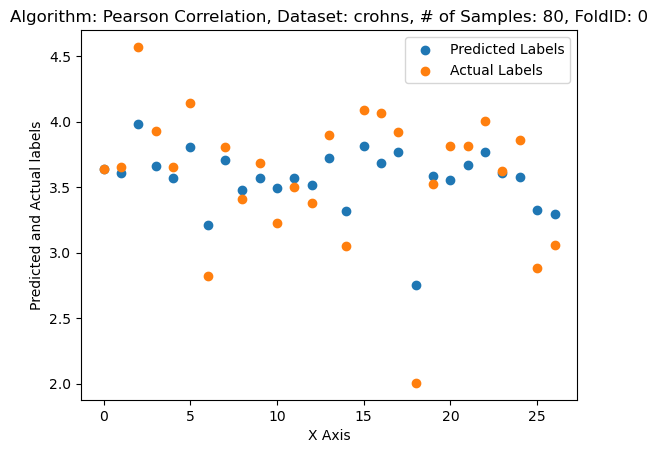

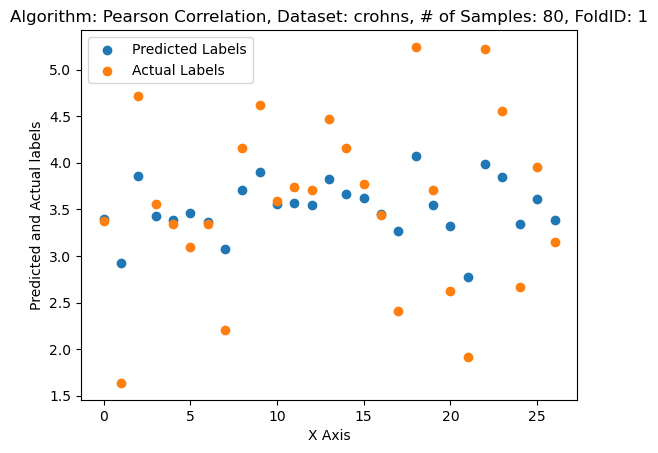

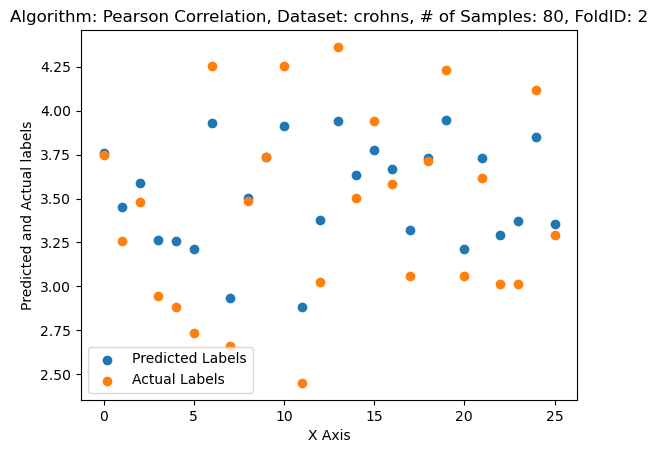

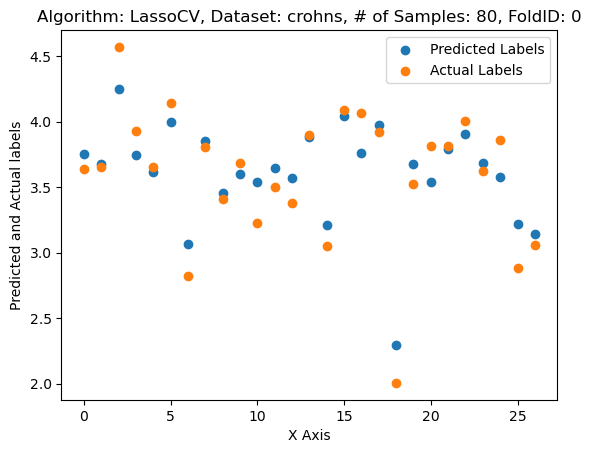

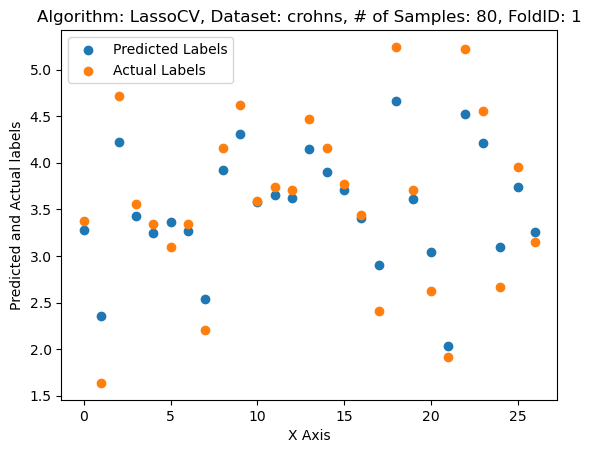

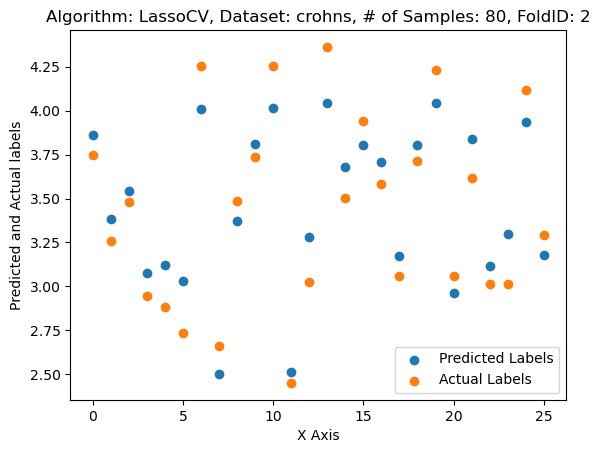

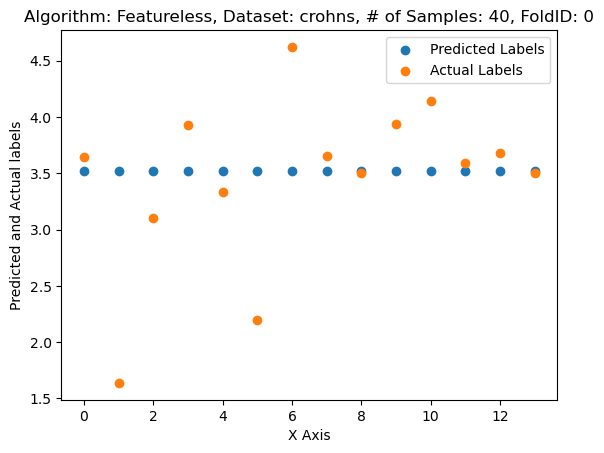

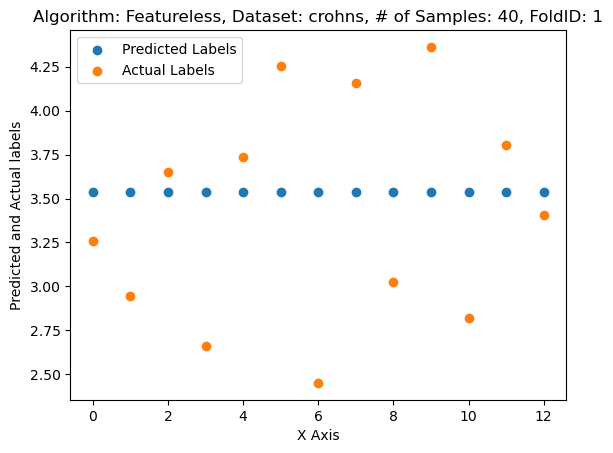

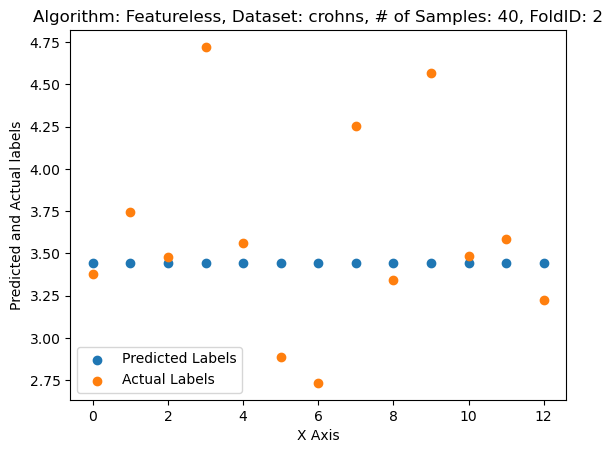

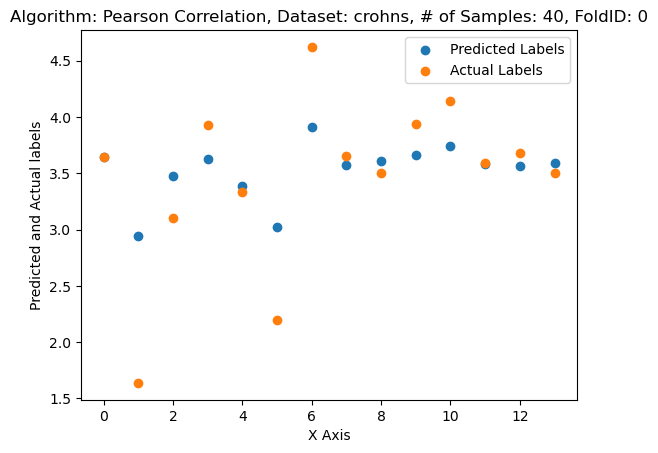

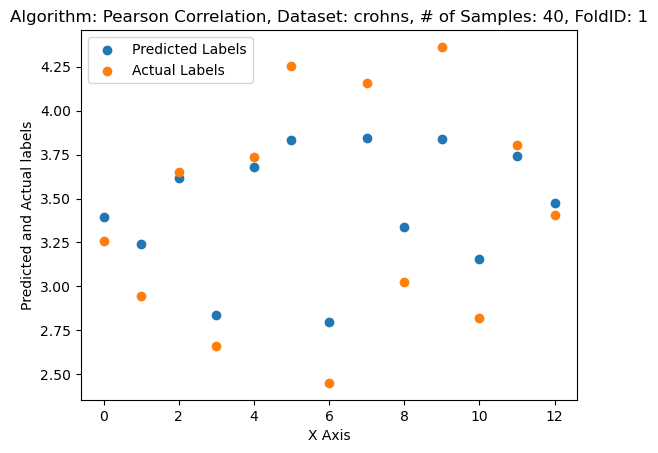

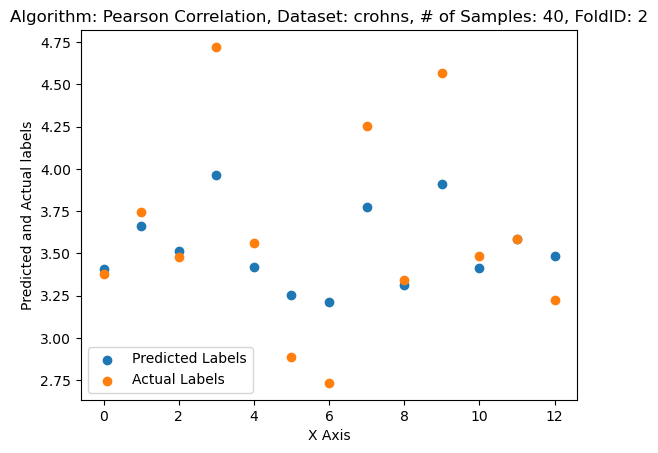

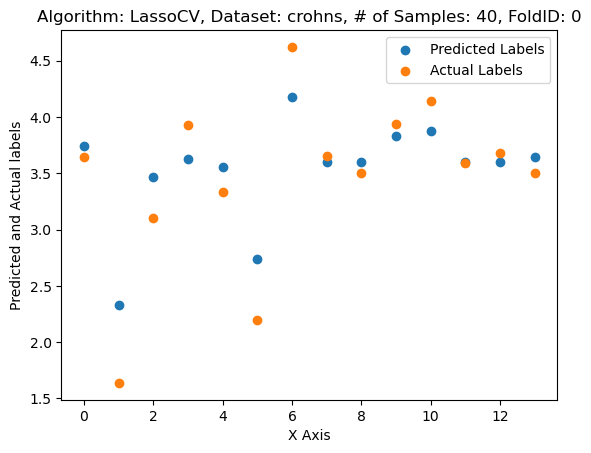

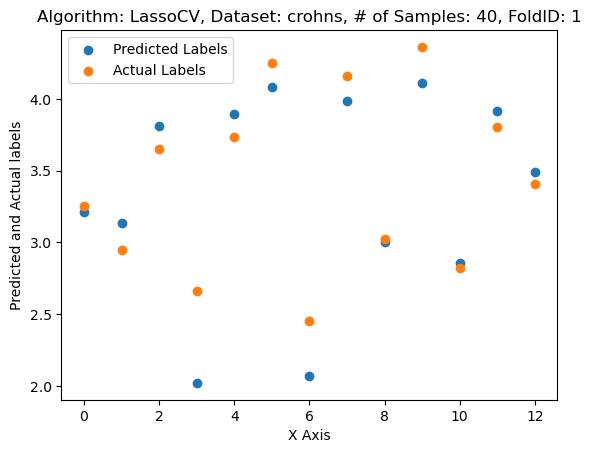

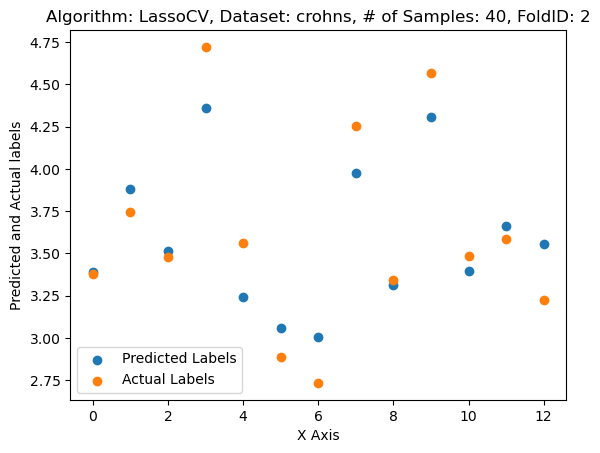

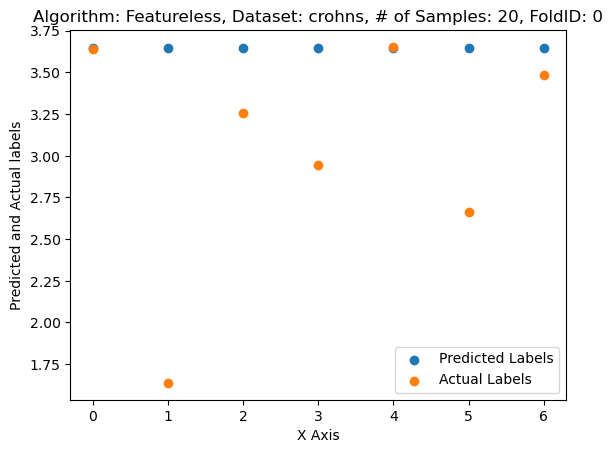

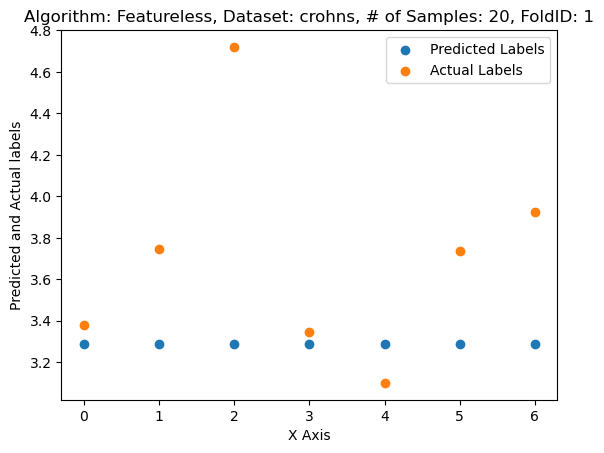

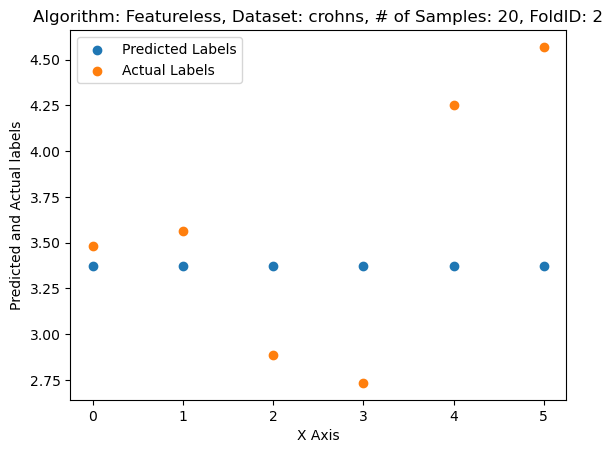

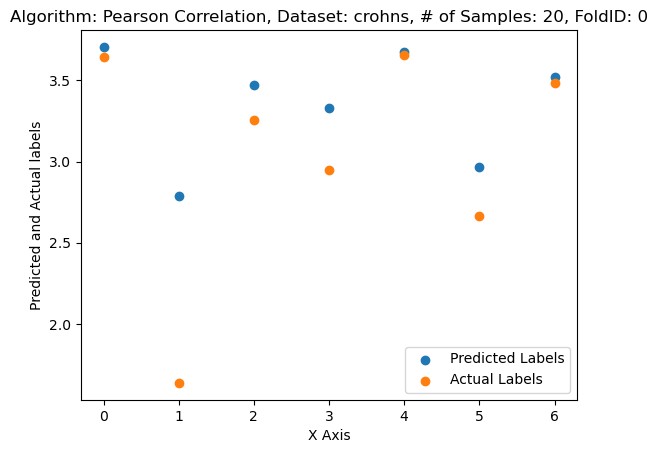

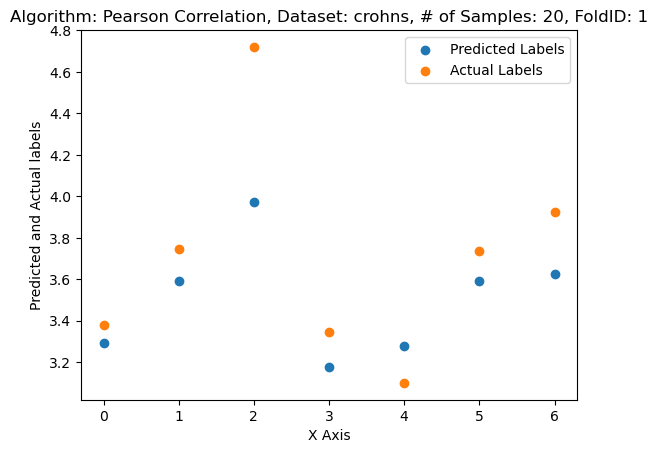

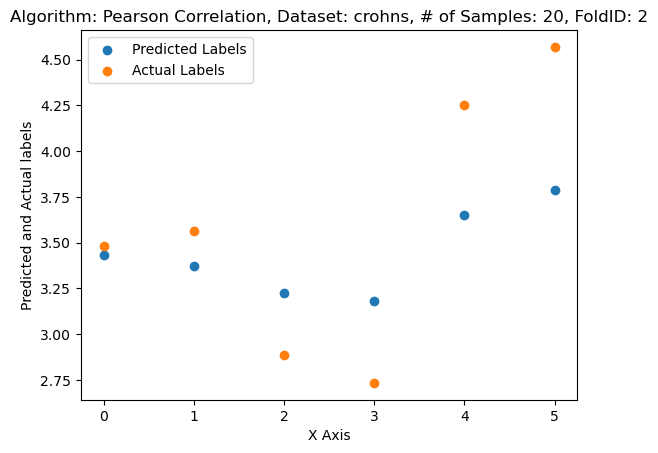

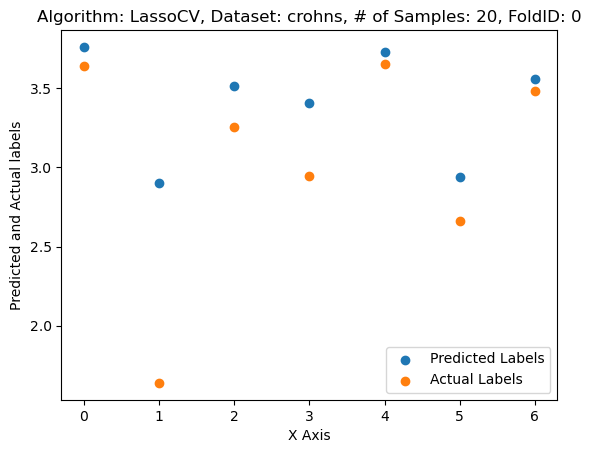

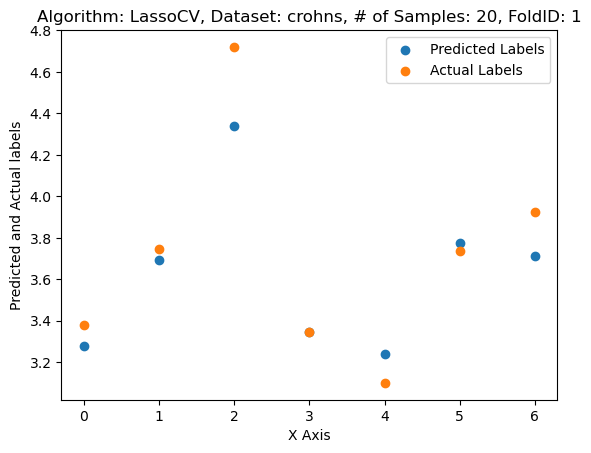

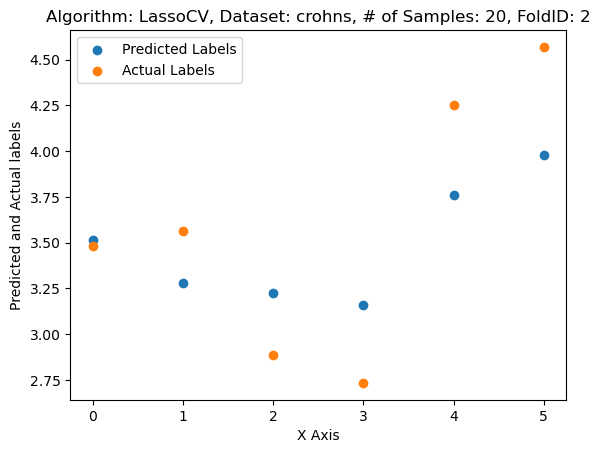

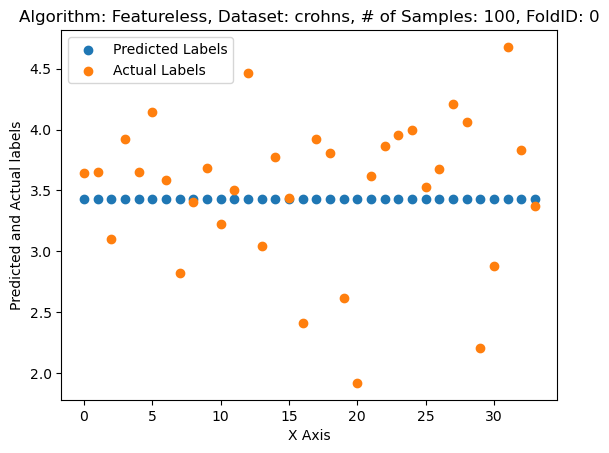

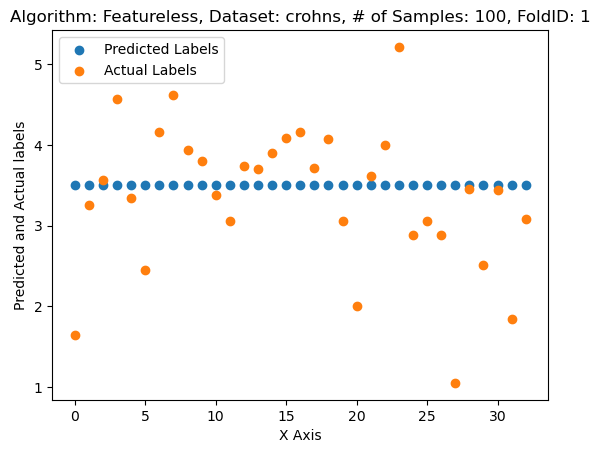

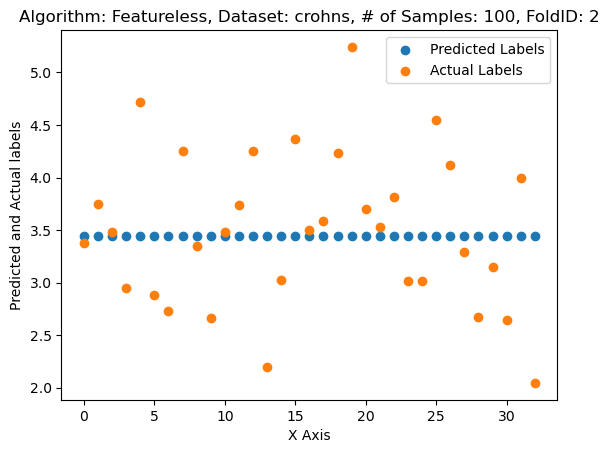

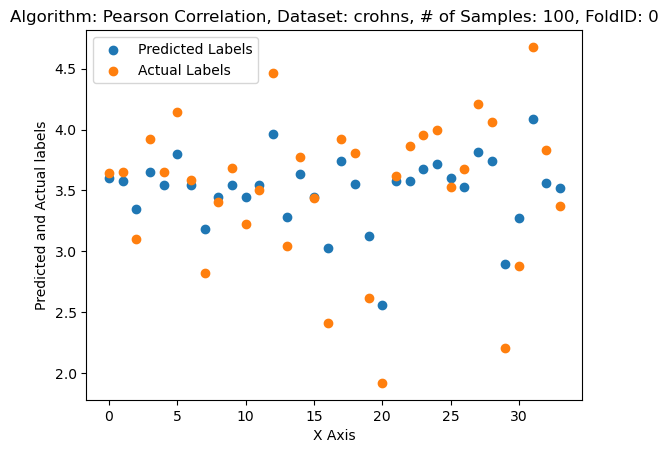

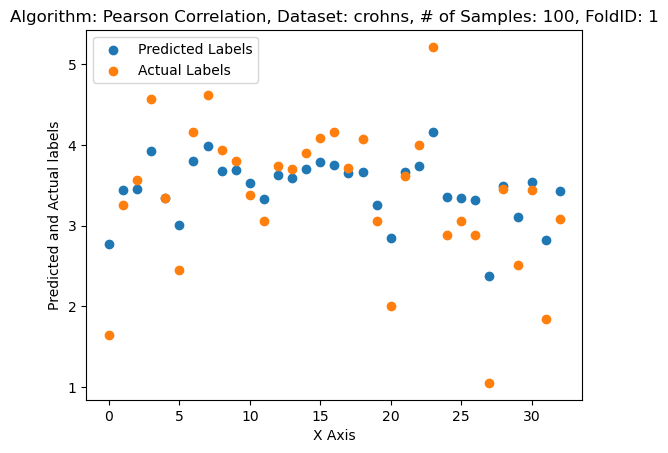

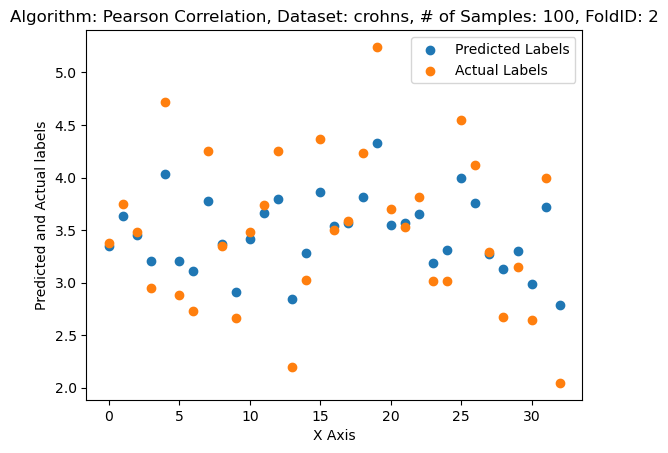

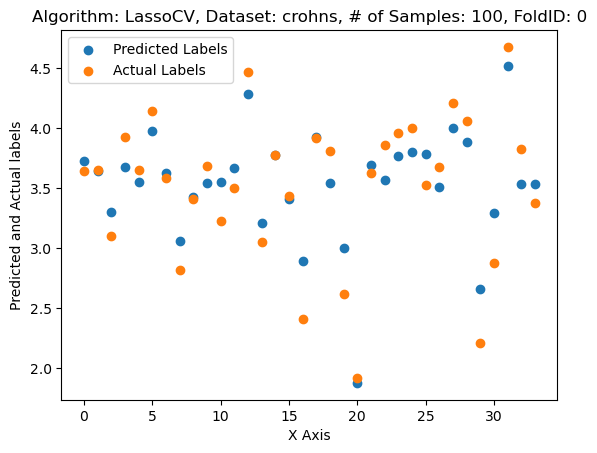

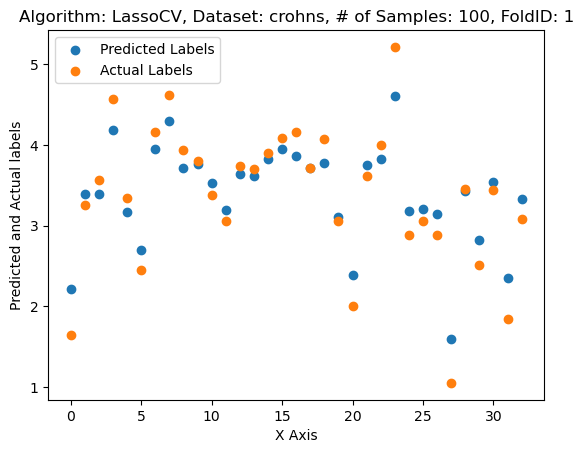

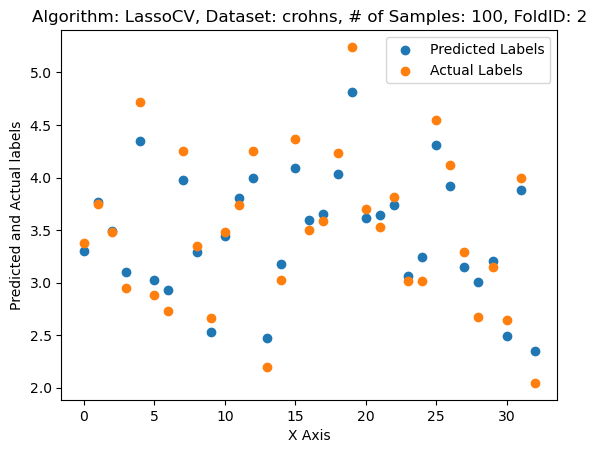

In [20]:
# Get unique values as list from column name `Dataset`
dataset_list = error_df["Dataset"].unique().tolist()
for dataset in dataset_list:
    test_error_df_list = []
    # Get new dataframe with only the dataset
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            
            fold_id_list = sub_filtered_csv["FoldID"].unique().tolist()
            for fold_id in fold_id_list:
                sub_sub_filtered_csv = sub_filtered_csv[sub_filtered_csv["FoldID"] == fold_id]
                index_of_pred_list = sub_sub_filtered_csv["Index of Predicted Column"].unique().tolist()
                
                # find the mean of  Predicted Label and  Actual Label columns based on the index of predicted column
                pred_label_array = []
                actual_label_array = []
                for index_of_pred in index_of_pred_list:
                    pred_label_list = sub_sub_filtered_csv.loc[sub_sub_filtered_csv["Index of Predicted Column"] == index_of_pred, "Predicted Label"].tolist()
                    actual_label_list = sub_sub_filtered_csv.loc[sub_sub_filtered_csv["Index of Predicted Column"] == index_of_pred, "Actual Label"].tolist()
                    pred_label_array.append(pred_label_list)
                    actual_label_array.append(actual_label_list)
                    
                mean_pred_label_array = np.array(pred_label_array).mean(axis=0)
                mean_actual_label_array = np.array(actual_label_array).mean(axis=0)
                    
               # x-axis: categorical values from the left to right
                x = [i for i in range(len(mean_pred_label_array))]

                # y-axis: the mean_pred_label_array and mean_actual_label_array
                y_pred = mean_pred_label_array
                y_actual = mean_actual_label_array

                # Create the scatter plot
                plt.scatter(x, y_pred, label='Predicted Labels')
                plt.scatter(x, y_actual, label='Actual Labels')

                # Add labels to the x and y-axis
                plt.xlabel('X Axis')
                plt.ylabel('Predicted and Actual labels')

                # Add a legend to the plot
                plt.legend()
                
                # Add a title to the plot
                plt.title(f"Algorithm: {algorithm}, Dataset: {dataset}, # of Samples: {n_sample}, FoldID: {fold_id}")

                # Show the plot
                plt.show()